In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_armaan.csv", parse_dates=["date"]).sort_values("date").reset_index(drop=True)


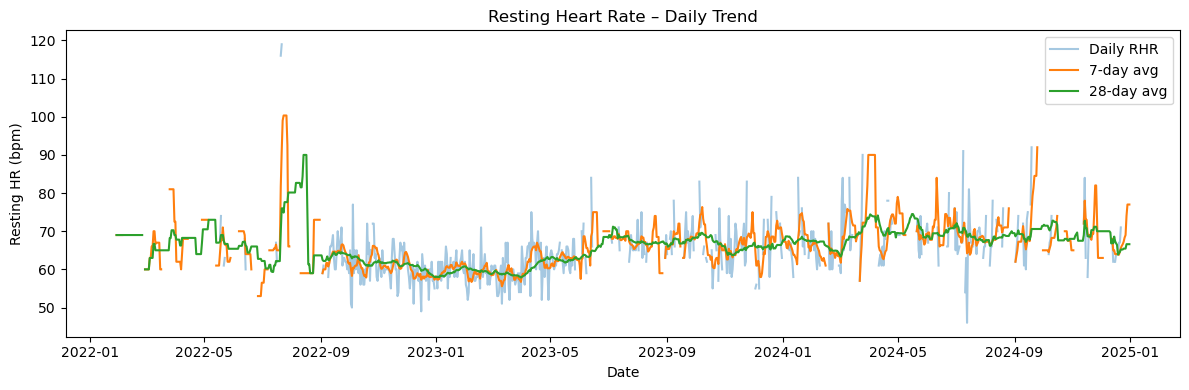

In [2]:
tmp = df[["date","RestingHeartRate"]].copy()
tmp["roll7"] = tmp["RestingHeartRate"].rolling(7, min_periods=1).mean()
tmp["roll28"] = tmp["RestingHeartRate"].rolling(28, min_periods=1).mean()

plt.figure(figsize=(12,4))
plt.plot(tmp["date"], tmp["RestingHeartRate"], alpha=0.4, label="Daily RHR")
plt.plot(tmp["date"], tmp["roll7"], label="7-day avg")
plt.plot(tmp["date"], tmp["roll28"], label="28-day avg")
plt.title("Resting Heart Rate – Daily Trend")
plt.xlabel("Date"); plt.ylabel("Resting HR (bpm)"); plt.legend()
plt.tight_layout(); plt.show()


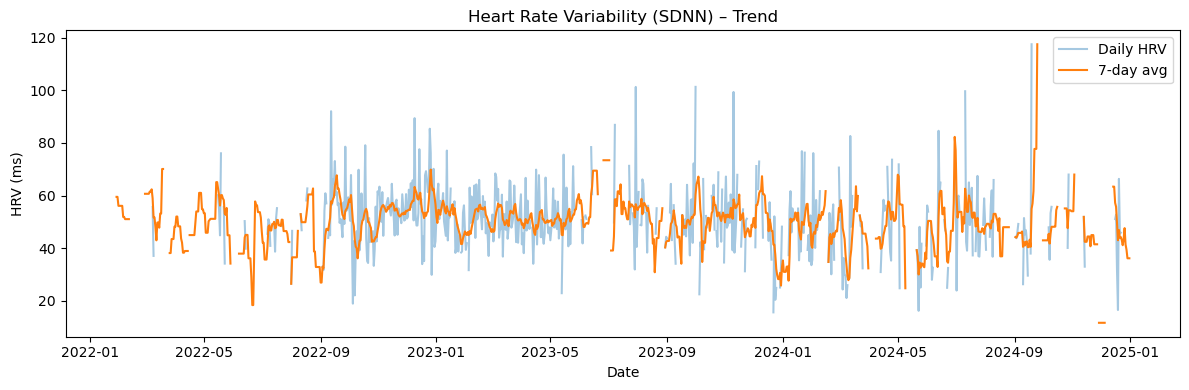

In [3]:
tmp = df[["date","HeartRateVariabilitySDNN"]].copy()
tmp["roll7"] = tmp["HeartRateVariabilitySDNN"].rolling(7, min_periods=1).mean()

plt.figure(figsize=(12,4))
plt.plot(tmp["date"], tmp["HeartRateVariabilitySDNN"], alpha=0.4, label="Daily HRV")
plt.plot(tmp["date"], tmp["roll7"], label="7-day avg")
plt.title("Heart Rate Variability (SDNN) – Trend")
plt.xlabel("Date"); plt.ylabel("HRV (ms)"); plt.legend()
plt.tight_layout(); plt.show()


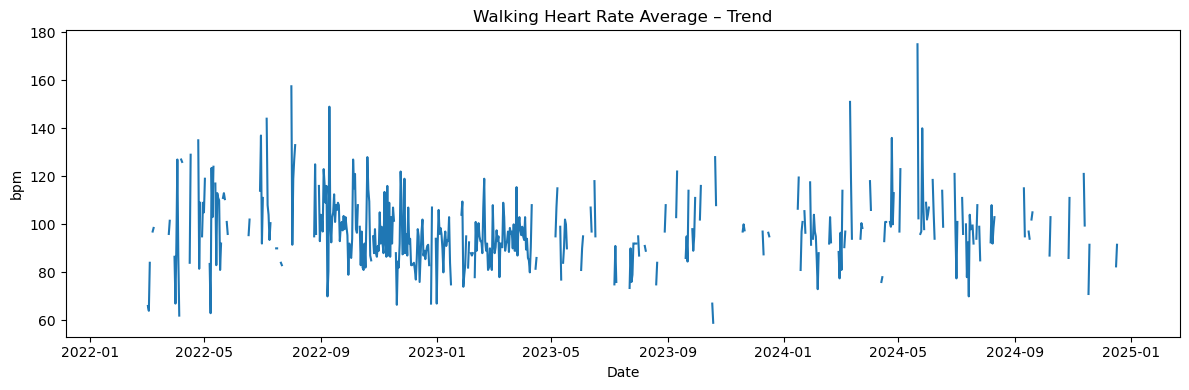

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["WalkingHeartRateAverage"])
plt.title("Walking Heart Rate Average – Trend")
plt.xlabel("Date"); plt.ylabel("bpm")
plt.tight_layout(); plt.show()


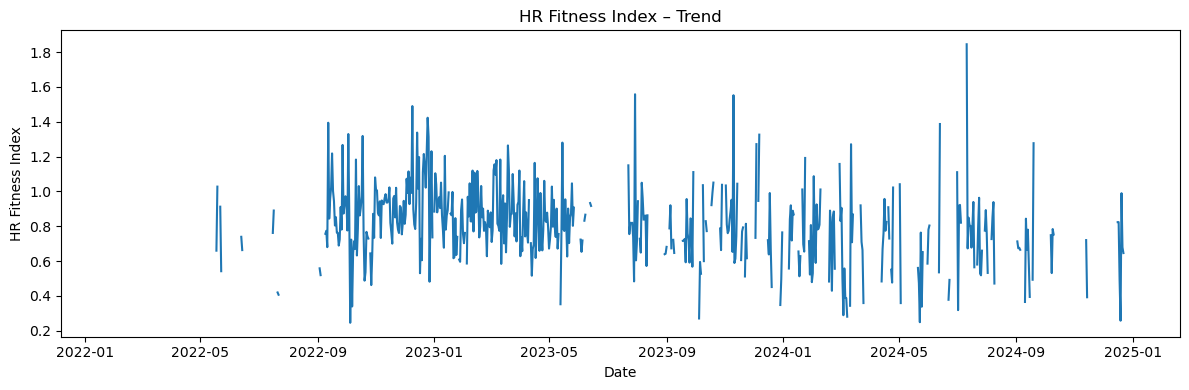

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["HRFitnessIndex"])
plt.title("HR Fitness Index – Trend")
plt.xlabel("Date"); plt.ylabel("HR Fitness Index")
plt.tight_layout(); plt.show()


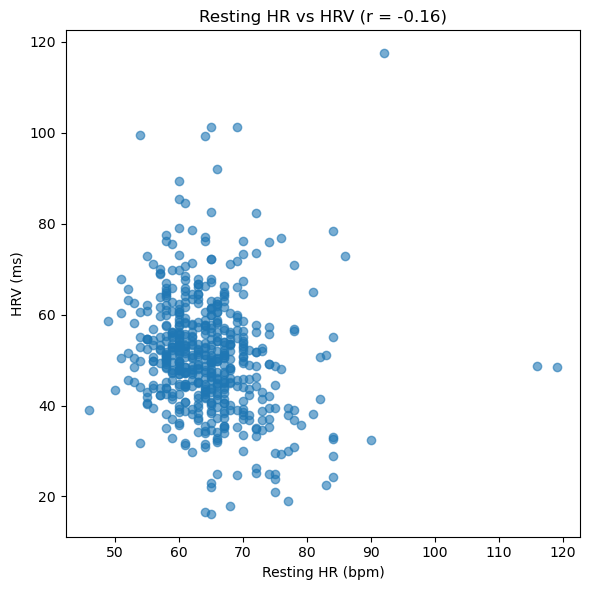

In [6]:
mask = df["RestingHeartRate"].notna() & df["HeartRateVariabilitySDNN"].notna()
r = df.loc[mask, ["RestingHeartRate","HeartRateVariabilitySDNN"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"RestingHeartRate"], df.loc[mask,"HeartRateVariabilitySDNN"], alpha=0.6)
plt.title(f"Resting HR vs HRV (r = {r:.2f})")
plt.xlabel("Resting HR (bpm)"); plt.ylabel("HRV (ms)")
plt.tight_layout(); plt.show()


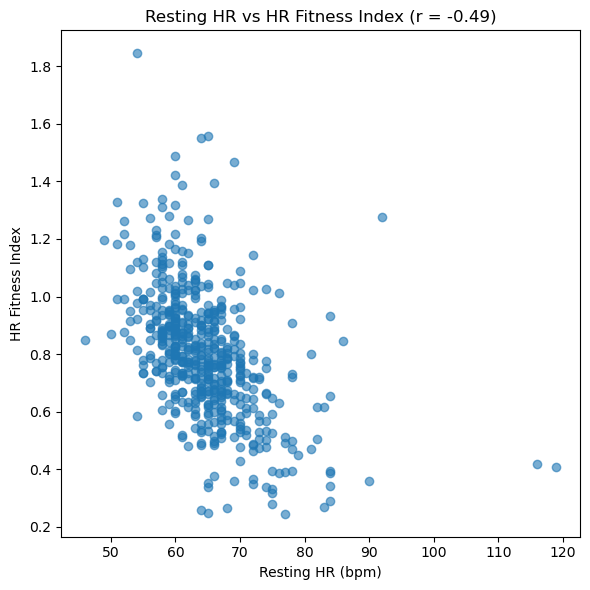

In [7]:
mask = df["RestingHeartRate"].notna() & df["HRFitnessIndex"].notna()
r = df.loc[mask, ["RestingHeartRate","HRFitnessIndex"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"RestingHeartRate"], df.loc[mask,"HRFitnessIndex"], alpha=0.6)
plt.title(f"Resting HR vs HR Fitness Index (r = {r:.2f})")
plt.xlabel("Resting HR (bpm)"); plt.ylabel("HR Fitness Index")
plt.tight_layout(); plt.show()


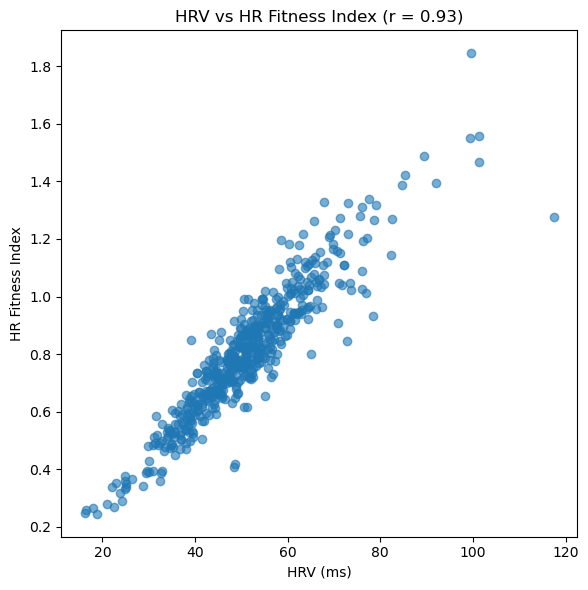

In [8]:
mask = df["HeartRateVariabilitySDNN"].notna() & df["HRFitnessIndex"].notna()
r = df.loc[mask, ["HeartRateVariabilitySDNN","HRFitnessIndex"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"HeartRateVariabilitySDNN"], df.loc[mask,"HRFitnessIndex"], alpha=0.6)
plt.title(f"HRV vs HR Fitness Index (r = {r:.2f})")
plt.xlabel("HRV (ms)"); plt.ylabel("HR Fitness Index")
plt.tight_layout(); plt.show()
